# Total field anomaly - Prism

**This notebook shows the calculation of the total field magnetic anomaly due to rectangular prism with finite dimensions. This implementation is based on Nagy (2000), where we calculate the values of the anomaly given the dimensions of the prisms in the $x$, $y$ and $z$ directions.**

**Unlike the implementation proposed in Blakely (1996), it is not necessary to calculate the subtraction between the initial and final depths, $z_1$ and $z_2$.**

In [1]:
# Copying all usefull libraries
import numpy as np
from matplotlib import pyplot as plt
import sys

In [2]:
a = sys.path.append('codes/') 

In [3]:
from codes import grids, prism, sphere

In [4]:
# Definition for number of points and grid creation
shape = (100, 100)
x, y, z = grids.regular_grid((-2000., 2000., -2000., 2000.), shape, -50.)

In [5]:
# Setting the parameters for prism
model = [-500., 500., -500., 500., 400., 800.] 
esfera = [0., 0., 300., 200.]# meters + A/m2
#model2 = [-150., 150., -150., 150., 100., 350., 0.75]

# Writing inclination, declination, azimuth 
incf, decf = -22., -36. # regional field

In [7]:
# Calculating total field due to a solid prims
tf = prism.prism_tf(x, y, z, model, 2., incf, decf, incf + 5., decf + 5.) +\
    sphere.sphere_tfa(x, y, z, esfera, 2., incf, decf, incf + 5., decf + 5.) #+ prism_tf(x, y, z, model2, incf, decf)

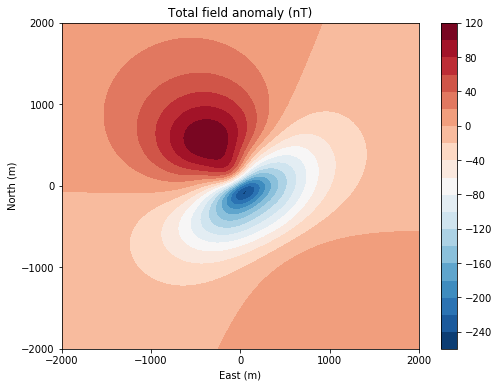

In [9]:
# Ploting all results 
plt.close('all')
plt.figure(figsize=(8,6))

plt.contourf(y.reshape(shape), x.reshape(shape), tf.reshape(shape), 20, cmap = plt.cm.RdBu_r)
plt.title('Total field anomaly (nT)', fontsize = 12)
plt.xlabel('East (m)', fontsize = 10)
plt.ylabel('North (m)', fontsize = 10)
plt.xticks(np.linspace(x.min(), x.max(), 5))
plt.yticks(np.linspace(y.min(), y.max(), 5))
plt.colorbar()

plt.show()